# Openai Assistant notebook for data analysis

This notebook takes two files as attachments, sends them to the assistant for analysis and then can return either:
- a text with the results of the analysis, or
- a chart that visualizes the requested analysis

Remarks: 
1. The assistant can either return text or images, not both together, so make sure the prompt does not contain a request for both the analysis and the images/figures.
2. The assistant is stateless. Each time we call in a new cell, the conversation restarts, therefore it has no memory of what has been said.

In [3]:
import sys
import pandas as pd
sys.path.append('/Users/georsara11/Desktop/python/DataMirror/datamirror')

In [4]:
from openai import OpenAI
client = OpenAI()

In [5]:
from api.openai_client import ask_gpt

In [7]:
from dotenv import load_dotenv

load_dotenv()

True

In [8]:
from PIL import Image
import io

def retrieve_file(client, file_id):

    api_response = client.files.with_raw_response.retrieve_content(file_id)

    if api_response.status_code == 200:

        content = api_response.content
        with open('imageoutput.png', 'wb') as f:
            f.write(content)
        print('File downloaded successfully.')

    image = Image.open(io.BytesIO(content))
#     image.show()
    return image

In [9]:
# Give filepaths for the two datasets to compare
file1_path = "/Users/georsara11/Desktop/python/DataMirror/data/data1.csv"
file2_path = "/Users/georsara11/Desktop/python/DataMirror/data/data2.csv"

In [10]:
df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

In [11]:
df1.head()

,Category1,Category2,Category3,Value1,Value2
0,A,A,A,4.445098,94.903505
1,A,C,B,7.656103,88.091675
2,C,D,A,78.073022,91.246189
3,B,C,A,37.266519,62.973321
4,B,B,C,38.902586,43.292858


In [12]:
df2.head()

,Category1,Category2,Category3,Value1,Value2
0,D,A,C,90.983392,44.745661
1,D,D,D,48.683517,60.520440
2,D,A,D,23.485716,1.650729
3,A,D,A,9.865848,88.334619
4,A,B,C,31.478950,28.533181


In [13]:
df1['Category1'].value_counts()

Category1
B    135
A    126
D    125
C    114
Name: count, dtype: int64

In [14]:
df2['Category1'].value_counts()

Category1
A    167
B    149
C    141
D    140
E      3
Name: count, dtype: int64

In [15]:
df1['Value2'].describe()

count    500.000000
mean      51.291657
std       28.215964
min        1.514327
25%       27.680908
50%       50.516047
75%       75.558495
max       99.990056
Name: Value2, dtype: float64

In [16]:
df2['Value2'].describe()

count    600.000000
mean      50.425017
std       29.261367
min        1.083488
25%       26.466896
50%       51.815240
75%       74.903475
max      147.023678
Name: Value2, dtype: float64

In [17]:
prompt = """
    The two uploaded datasets represent two snapshots of the same data in different points in time. Can you please tell me how the data has changed?

    For example, provide insights on:
    - Any differences in columns (names, types). Only comment if a difference is actually found.
    - Differences in numerical columns (e.g. distribution shifts between the first and second dataset).
    - Differences in categorical variables after performing a value count. Do not give me the actual value counts, give me a comment on what is more
    or less the same and what has changed (e.g. some categories disappear or new categories appear - and if so, which ones specifically). 
    The order of appearence of the categories does not qualify as a change.

    Please do not return any graphs, figures, images or any kind of visuallization.
"""

In [18]:
# Run analysis on the two datasets and get the response
messages = ask_gpt(file1_path, file2_path, prompt)
print(f"Assistant: {messages.data[0].content[0].text.value}")

Run status: in_progress
Run status: in_progress
Run status: in_progress
Run status: in_progress
Run status: in_progress
Run status: completed


------------------------------------------------------------ 

Assistant: **Categorical Variables Analysis:**

1. **Category1:**
   - In the first dataset (`df1`), the categories were `A`, `B`, `C`, `D`, and a rarely appearing category `E`.
   - In the second dataset (`df2`), the categories include `A`, `B`, `C`, and `D`, but `E` has disappeared.
   - The disappearance of category `E` is the notable change in `Category1`.

2. **Category2:**
   - The categories `A`, `B`, `C`, `D` are present in both datasets.
   - There are no new categories or disappearances between `df1` and `df2` for `Category2`.

3. **Category3:**
   - The categories `A`, `B`, `C`, `D` are consistent in both datasets.
   - No new categories appear, and no categories disappear in `Category3`.

Overall, the significant change in the categorical variables is the disappearance o

In [19]:
prompt = """
    I have uploaded two datasets that represent two snapshots of the same data in different points in time.
    Please perform a value count of the categorical variable 'Category1' in both datasets and plot it as a single barchart.
    Also, please provide me the python code to download the generated image fie and save it on my machine."""

Run status: queued
Run status: in_progress
Run status: in_progress
Run status: in_progress
Run status: completed


------------------------------------------------------------ 

File downloaded successfully.


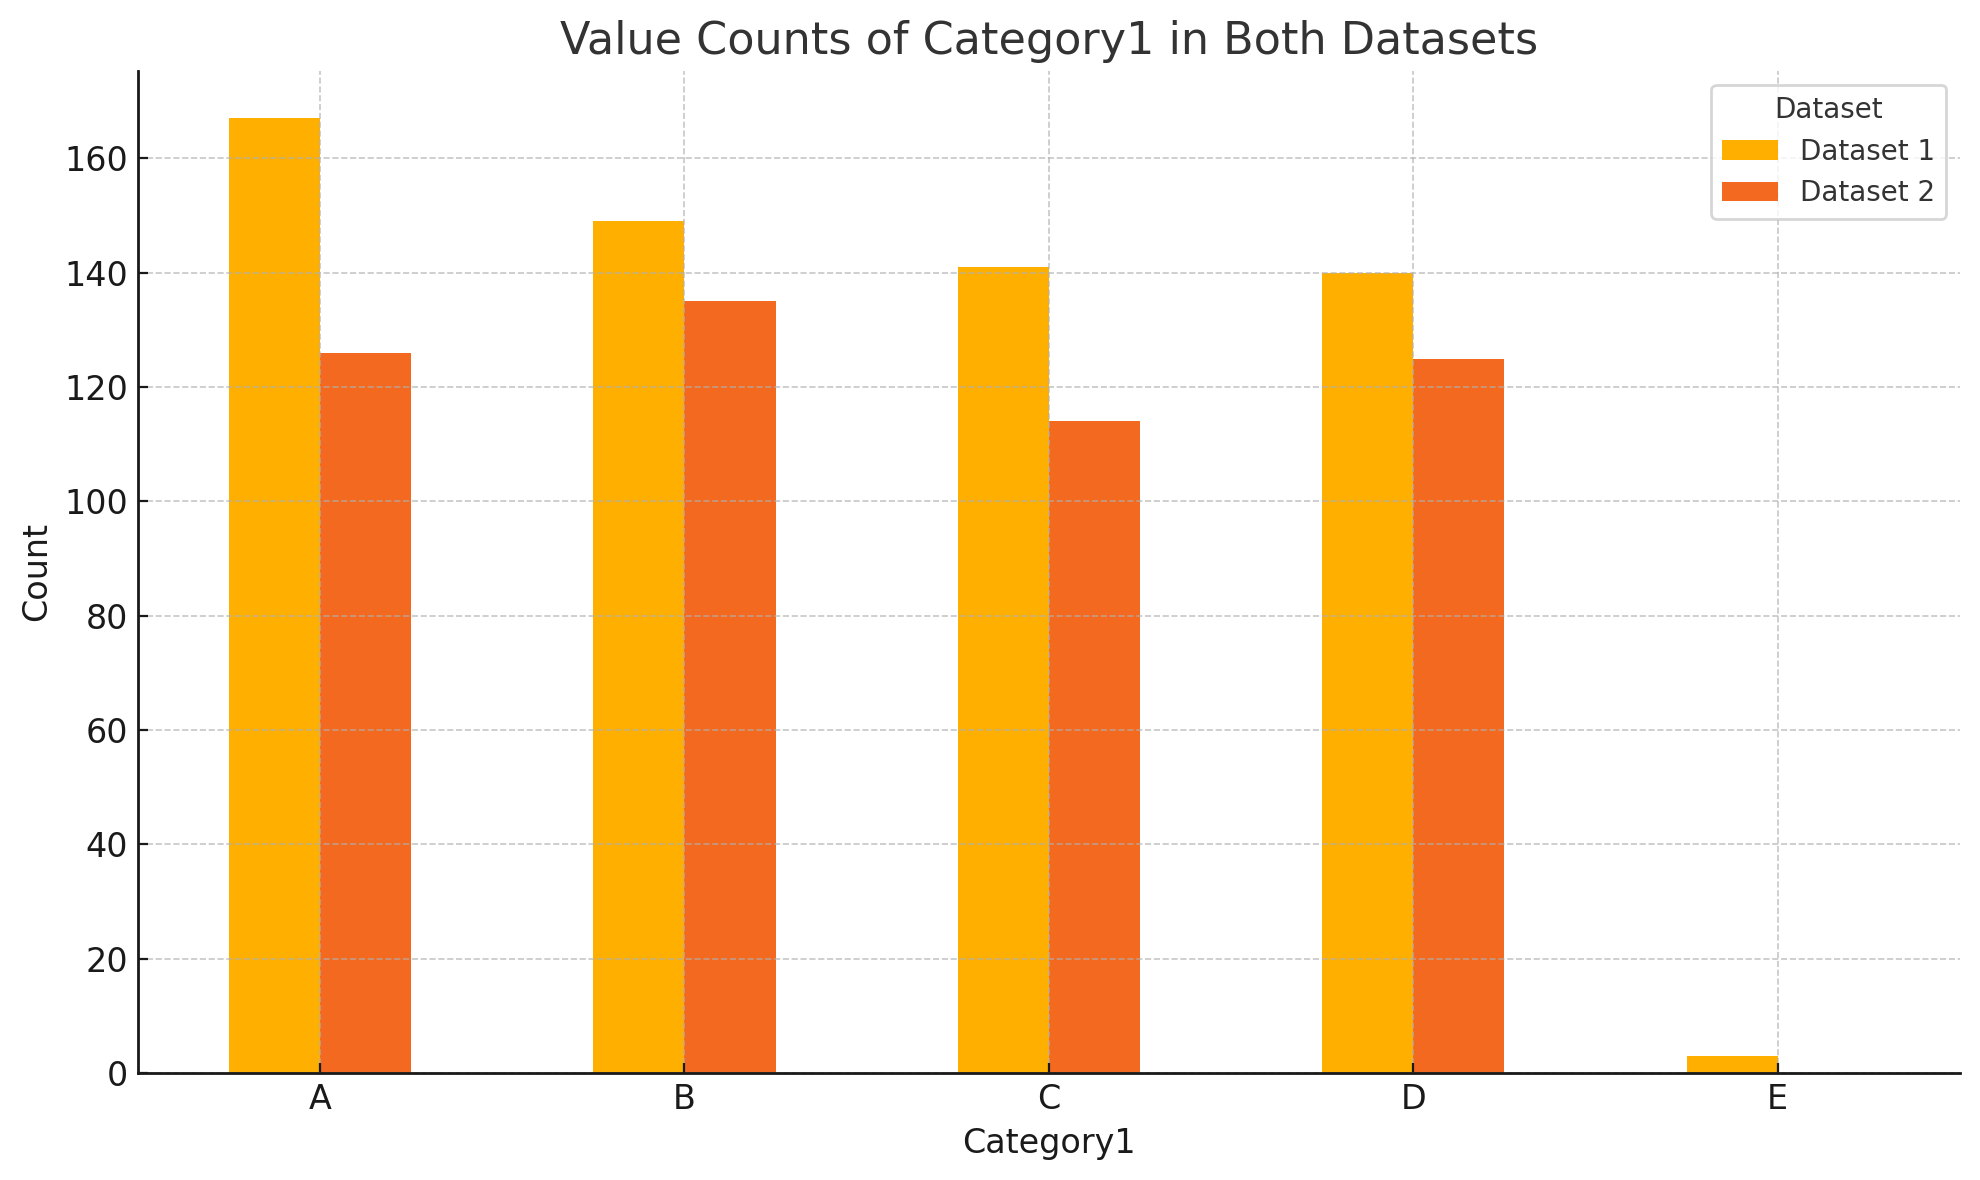

In [20]:
# Run analysis on the two datasets and get the response
messages = ask_gpt(file1_path, file2_path, prompt)
# Retrieve the image file and display it
retrieve_file(client, messages.data[0].content[0].image_file.file_id)